In [1]:
setwd('/import/liujing/data/scRNA/')

In [2]:
getwd()

[1] "/import/liujing/data/scRNA"

In [3]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [4]:
immune.combined = readRDS('./before_rename.rds')

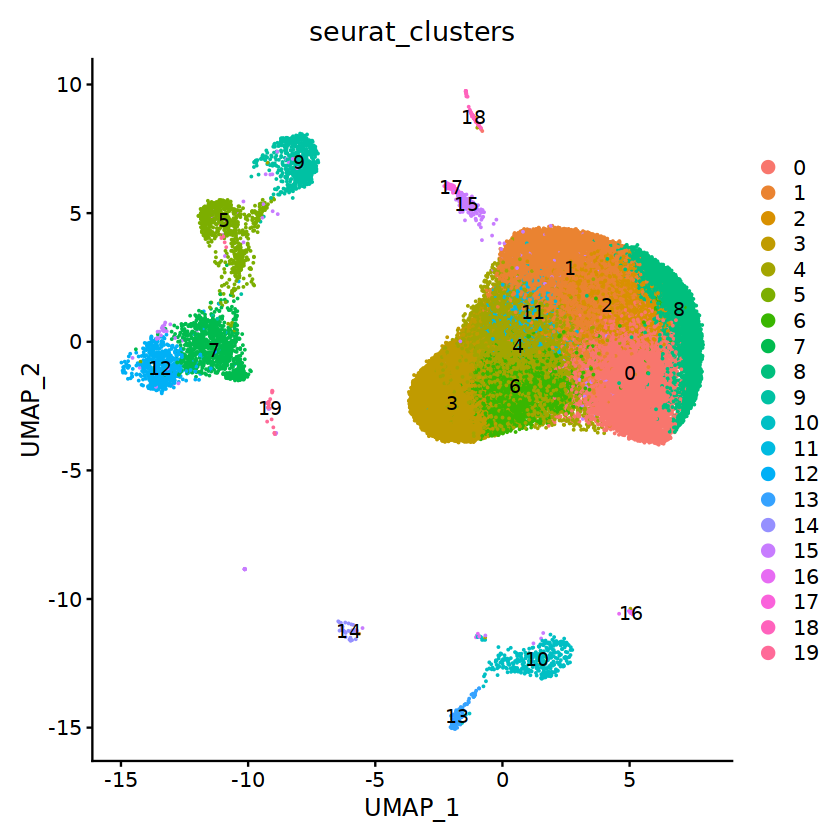

In [5]:
DimPlot(immune.combined, reduction = "umap", group.by  = "seurat_clusters",label = T)

In [7]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


In [8]:
ggsave('figure4.pdf',height =  8,width = 12)

In [9]:
scRNA = immune.combined

In [10]:
library(Seurat) ##
library(SingleR)
library(ggplot2)
library(reshape2)
mouseImmu  = get(load('/import/DB/SingleR_ref/ref_Human_all.RData'))

Warning message:
"package 'SingleR' was built under R version 4.2.3"
Loading required package: SummarizedExperiment

Warning message:
"package 'SummarizedExperiment' was built under R version 4.2.2"
Loading required package: MatrixGenerics

Loading required package: matrixStats

Warning message:
"package 'matrixStats' was built under R version 4.2.3"

Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCou

In [11]:
pbmc_for_SingleR <- GetAssayData(scRNA, slot="data") ##获取标准化矩阵
clusters=scRNA@meta.data$seurat_clusters

In [12]:
pred.mouseImmu <- SingleR(test = pbmc_for_SingleR, ref = mouseImmu, labels = mouseImmu$label.main,
 method = "cluster", clusters = clusters, 
 assay.type.test = "logcounts", assay.type.ref = "logcounts")
celltype = data.frame(ClusterID=rownames(pred.mouseImmu), celltype=pred.mouseImmu$labels, stringsAsFactors = FALSE)

Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames =

In [13]:
scRNA@meta.data$celltype = "NA"
# 赋值
for(i in 1:nrow(celltype)){
  scRNA@meta.data[which(scRNA@meta.data$seurat_clusters == celltype$ClusterID[i]),'celltype'] <- celltype$celltype[i]}

In [14]:
table(scRNA$celltype,scRNA$seurat_clusters)

             
                  0     1     2     3     4     5     6     7     8     9    10
  B_cell          0     0     0     0     0     0     0     0     0     0     0
  HSC_-G-CSF      0     0     0     0     0     0     0     0     0     0     0
  Monocyte        0     0     0     0     0     0     0     0     0     0   379
  Myelocyte       0     0     0     0     0     0     0     0     0     0     0
  NK_cell         0     0     0     0     0     0     0     0     0   699     0
  Neutrophils 13296 13371  9663  7269  6708     0  4194     0  4125     0     0
  T_cells         0     0     0     0     0   802     0  1068     0     0     0
             
                 11    12    13    14    15    16    17    18    19
  B_cell          0     0     0    26     0     0     0     0     0
  HSC_-G-CSF      0     0     0     0     0     0     0     0    29
  Monocyte        0     0    95     0     0    38     0     0     0
  Myelocyte       0     0     0     0     0     0     0    6

In [15]:
table(scRNA$celltype)


     B_cell  HSC_-G-CSF    Monocyte   Myelocyte     NK_cell Neutrophils 
         26          29         512          69         699       62087 
    T_cells 
       2466 

In [16]:
Idents(scRNA) = 'celltype'

In [17]:
# scRNA = subset(scRNA,idents = c('Monocyte',
#                               'NK_cell','Neutrophils','T_cells','B_cell'))

In [18]:
library(Seurat)

In [19]:
options(repr.plot.width = 8,repr.plot.height = 5)

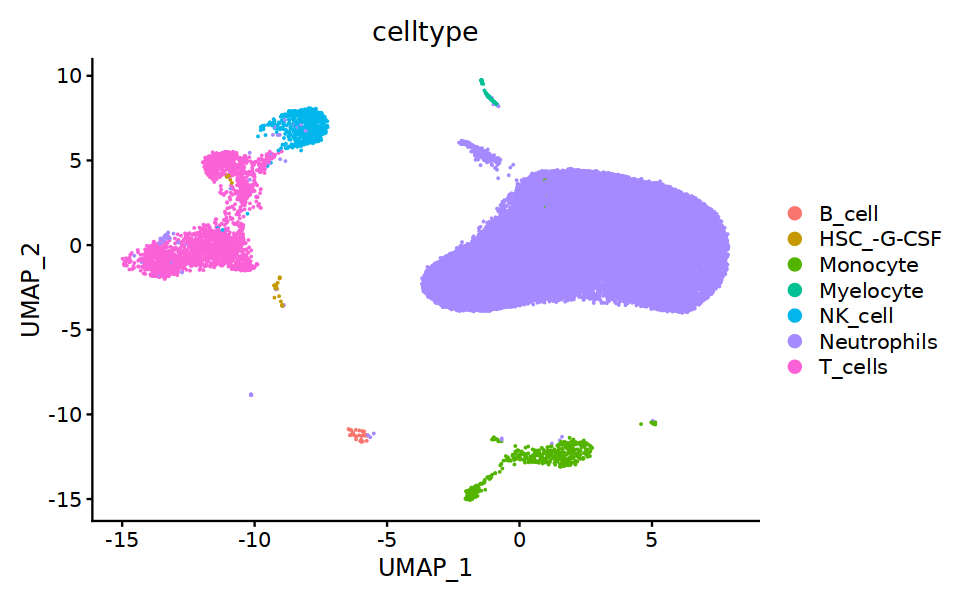

In [20]:
DimPlot(scRNA, group.by="celltype", label=F, label.size=5, reduction='umap')

In [21]:
library(ggplot2)

In [22]:
ggsave('figure5.pdf',height =  5,width = 9)

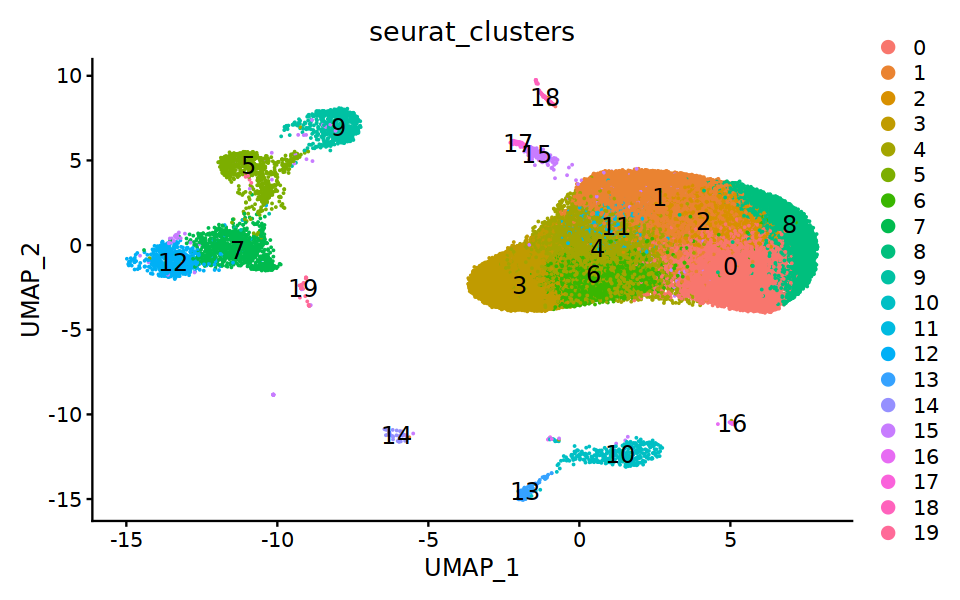

In [23]:
DimPlot(scRNA, group.by="seurat_clusters", label=T, label.size=5, reduction='umap')

In [24]:
ggsave('figure6.pdf',height =  8,width = 9)

In [25]:
Idents(scRNA) = 'seurat_clusters'

In [26]:
scedata = scRNA

In [27]:
Idents(scRNA) = 'celltype'

In [28]:
DefaultAssay(scRNA) = 'RNA'

In [29]:
#https://www.uniprot.org/uniprotkb/O00429/entry

In [30]:
options(repr.plot.width = 12,repr.plot.height = 12)

In [35]:
geneame = rownames(as.matrix(scRNA@assays$RNA@counts))

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 18.4 GiB"


In [37]:
save(geneame,file = 'genename.rda')

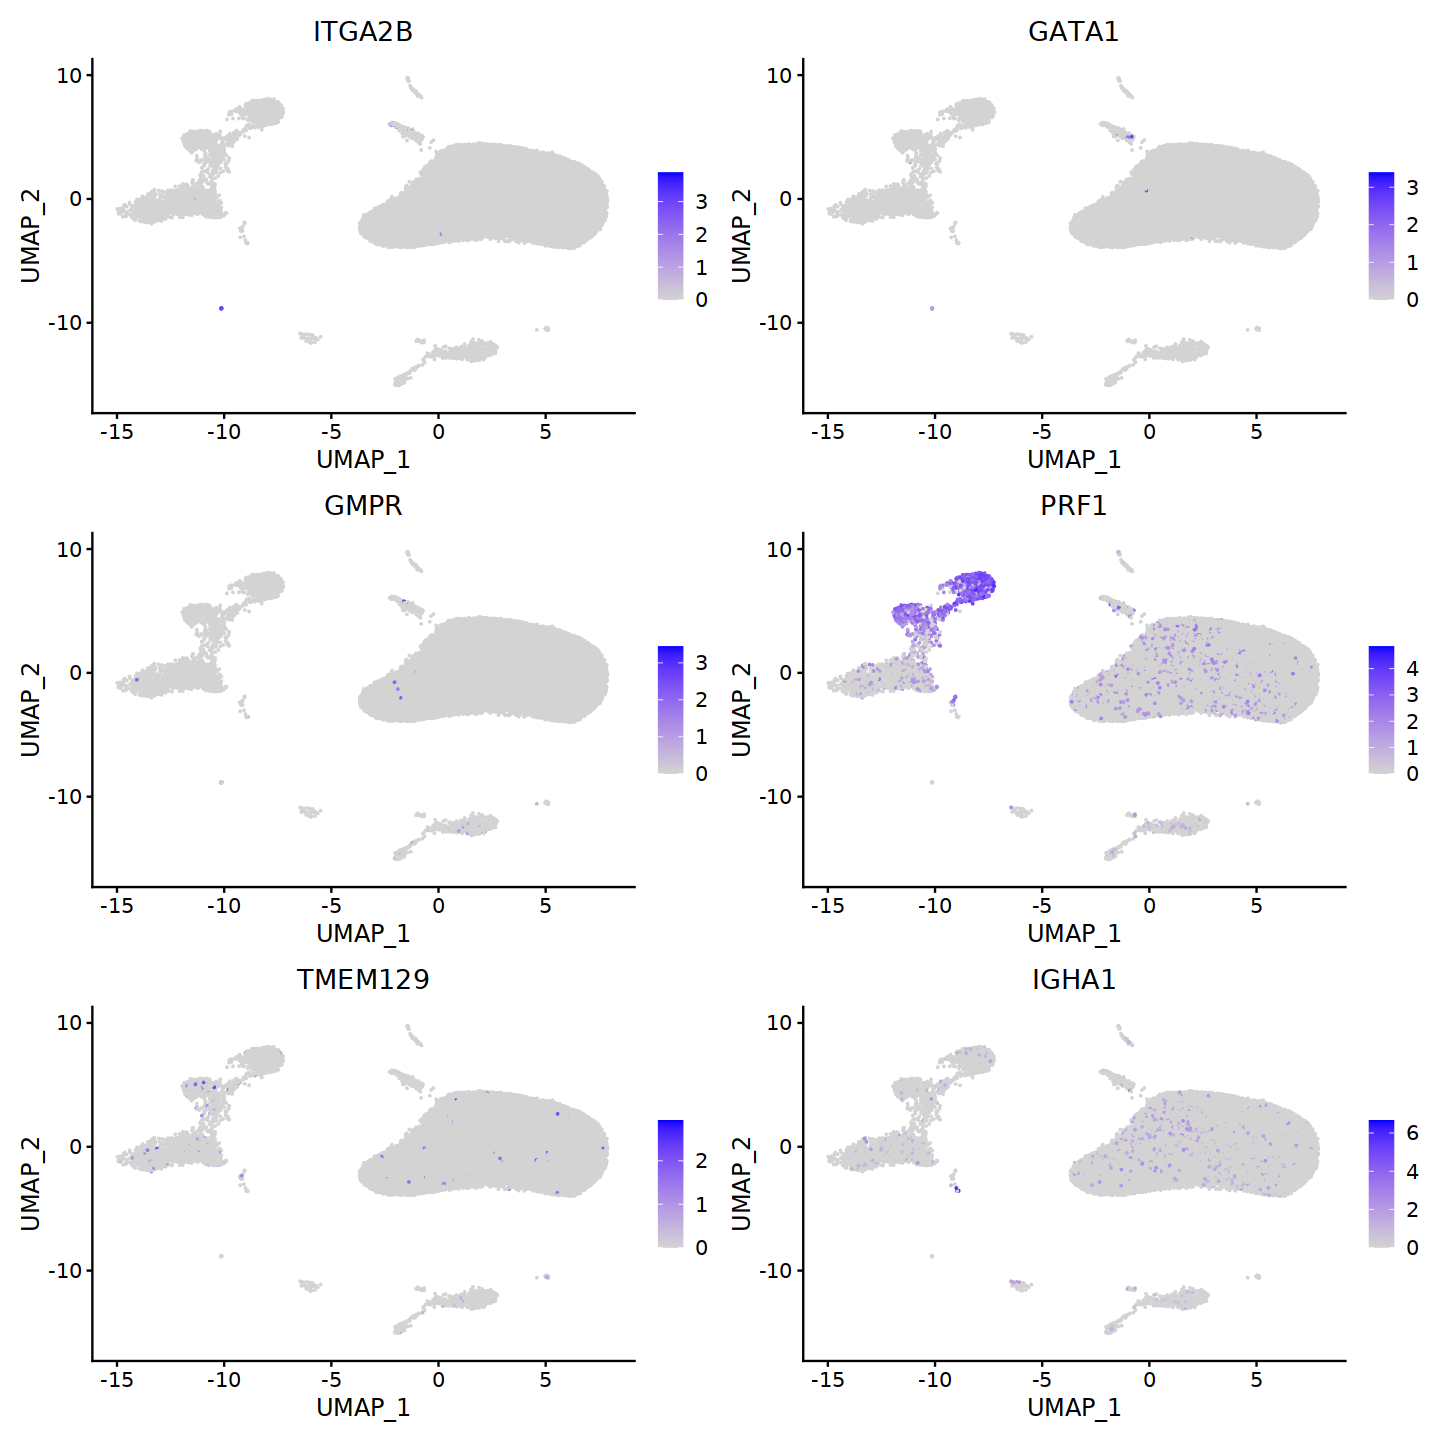

In [38]:
FeaturePlot(scRNA,features = c('ITGA2B','GATA1','GMPR','PRF1','TMEM129','IGHA1'))

In [32]:
Idents(scRNA) = 'group'

In [33]:
table(Idents(scRNA),scRNA$celltype)

       
        B_cell HSC_-G-CSF Monocyte Myelocyte NK_cell Neutrophils T_cells
  group     26         29      512        69     699       62087    2466

In [361]:
Idents(scRNA) = 'group'

In [368]:
options(repr.plot.width = 9,repr.plot.height = 8)

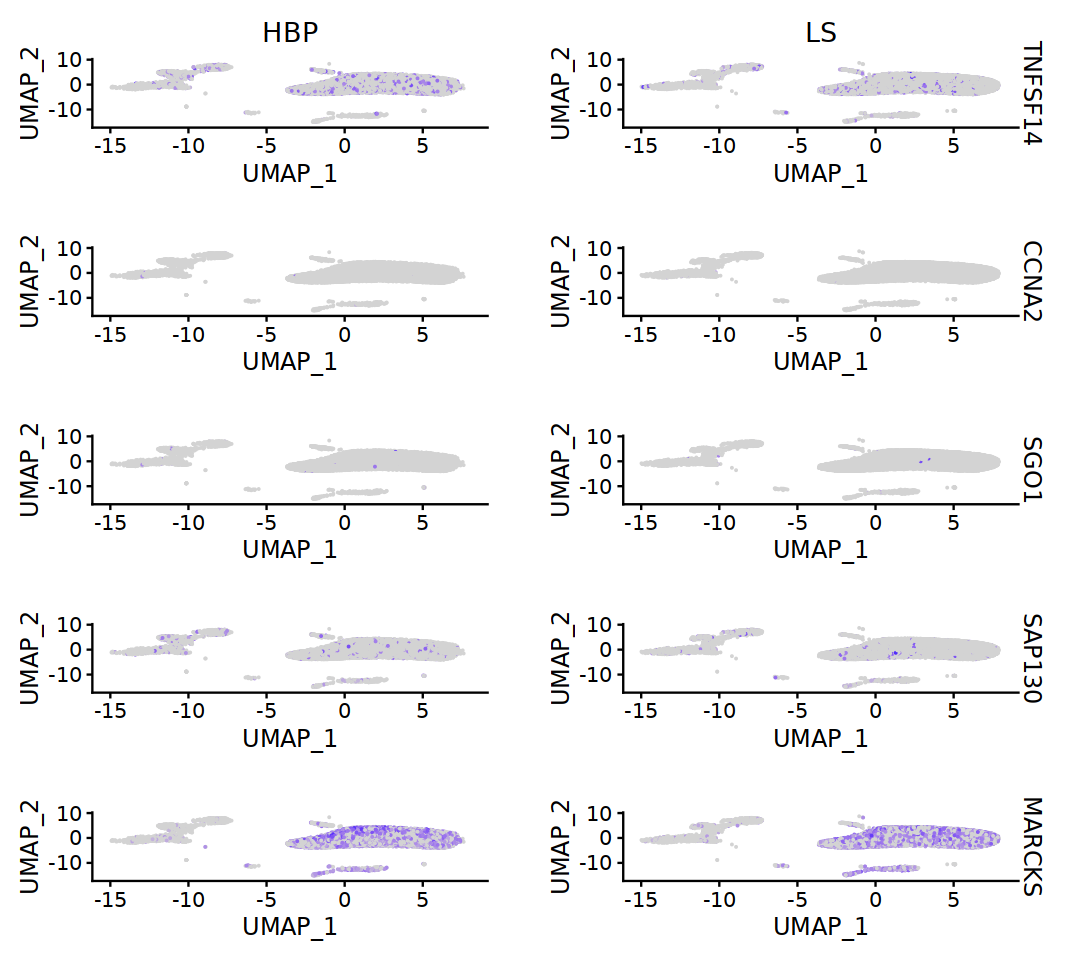

In [369]:
FeaturePlot(scRNA,features =c('TNFSF14','CCNA2','SGO1','SAP130','MARCKS'),split.by = 'group' )

In [294]:
scRNA$group = ifelse(scRNA@meta.data$orig.ident %in%c('HBP-1.matrix', 'HBP-2.matrix', 'HBP-3.matrix', 
                                                      'HBP-4.matrix', 'HBP-5.matrix', 'HBP-6.matrix' ),'HBP','LS' )

In [295]:
table(scRNA@meta.data$orig.ident)


HBP-1.matrix HBP-2.matrix HBP-3.matrix HBP-4.matrix HBP-5.matrix HBP-6.matrix 
        5210         3692         5069         4233         6584         6225 
 QG-1.matrix  QG-2.matrix  QG-3.matrix  QG-4.matrix  QG-5.matrix  QG-6.matrix 
        3874         4454         5084         4916         6833         4118 
 QG-7.matrix  QG-8.matrix 
        1137         4361 

In [296]:
Idents(scRNA) = 'group'

In [297]:
#'TNFSF14','CCNA2','MARCKS','SGO1','SAP130'

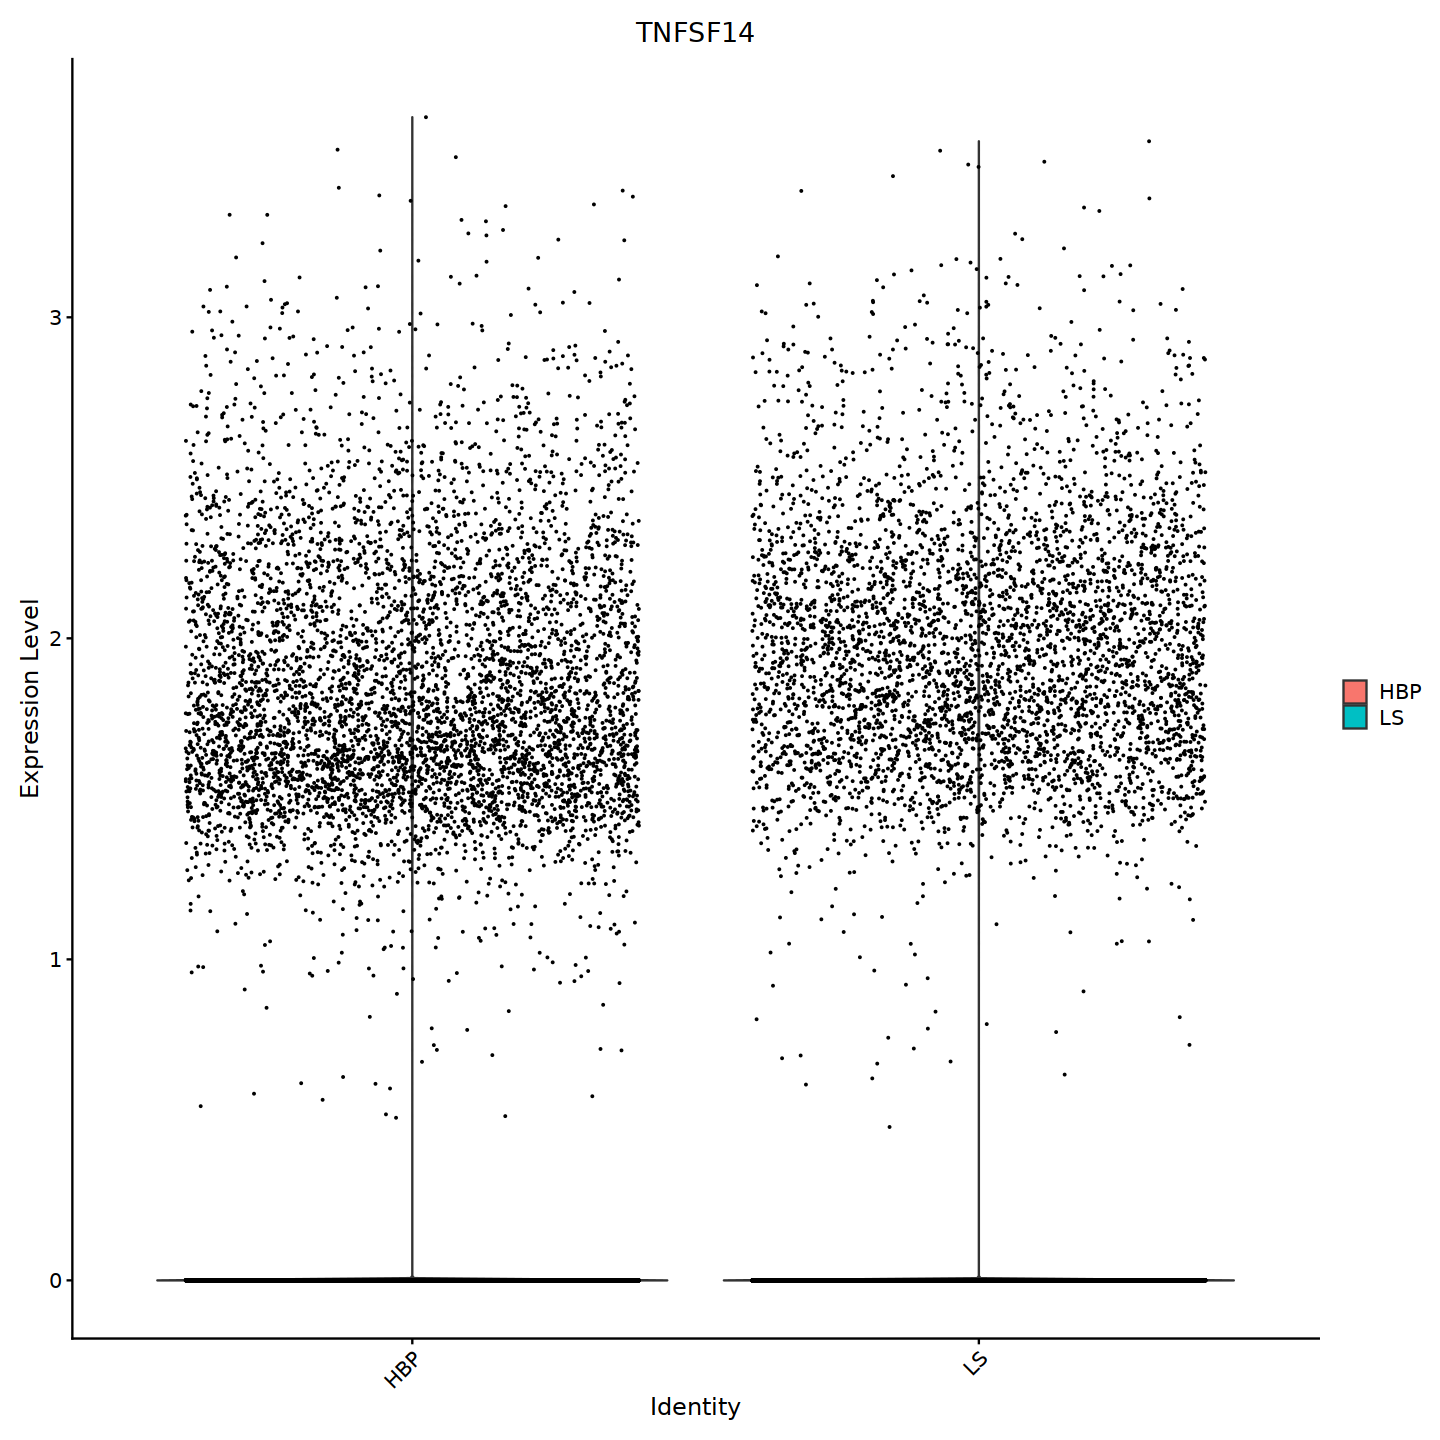

In [298]:
VlnPlot(scRNA,features = c('TNFSF14'))

In [299]:
#'TNFSF14','CCNA2','MARCKS','SGO1','SAP130'

In [300]:
library(AUCell)
library(clusterProfiler)
library(ggplot2)
library(Seurat)
#library(SeuratData)

Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



 min   1%   5%  10%  50% 100% 
 501  511  551  596  862 4472 


Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames =

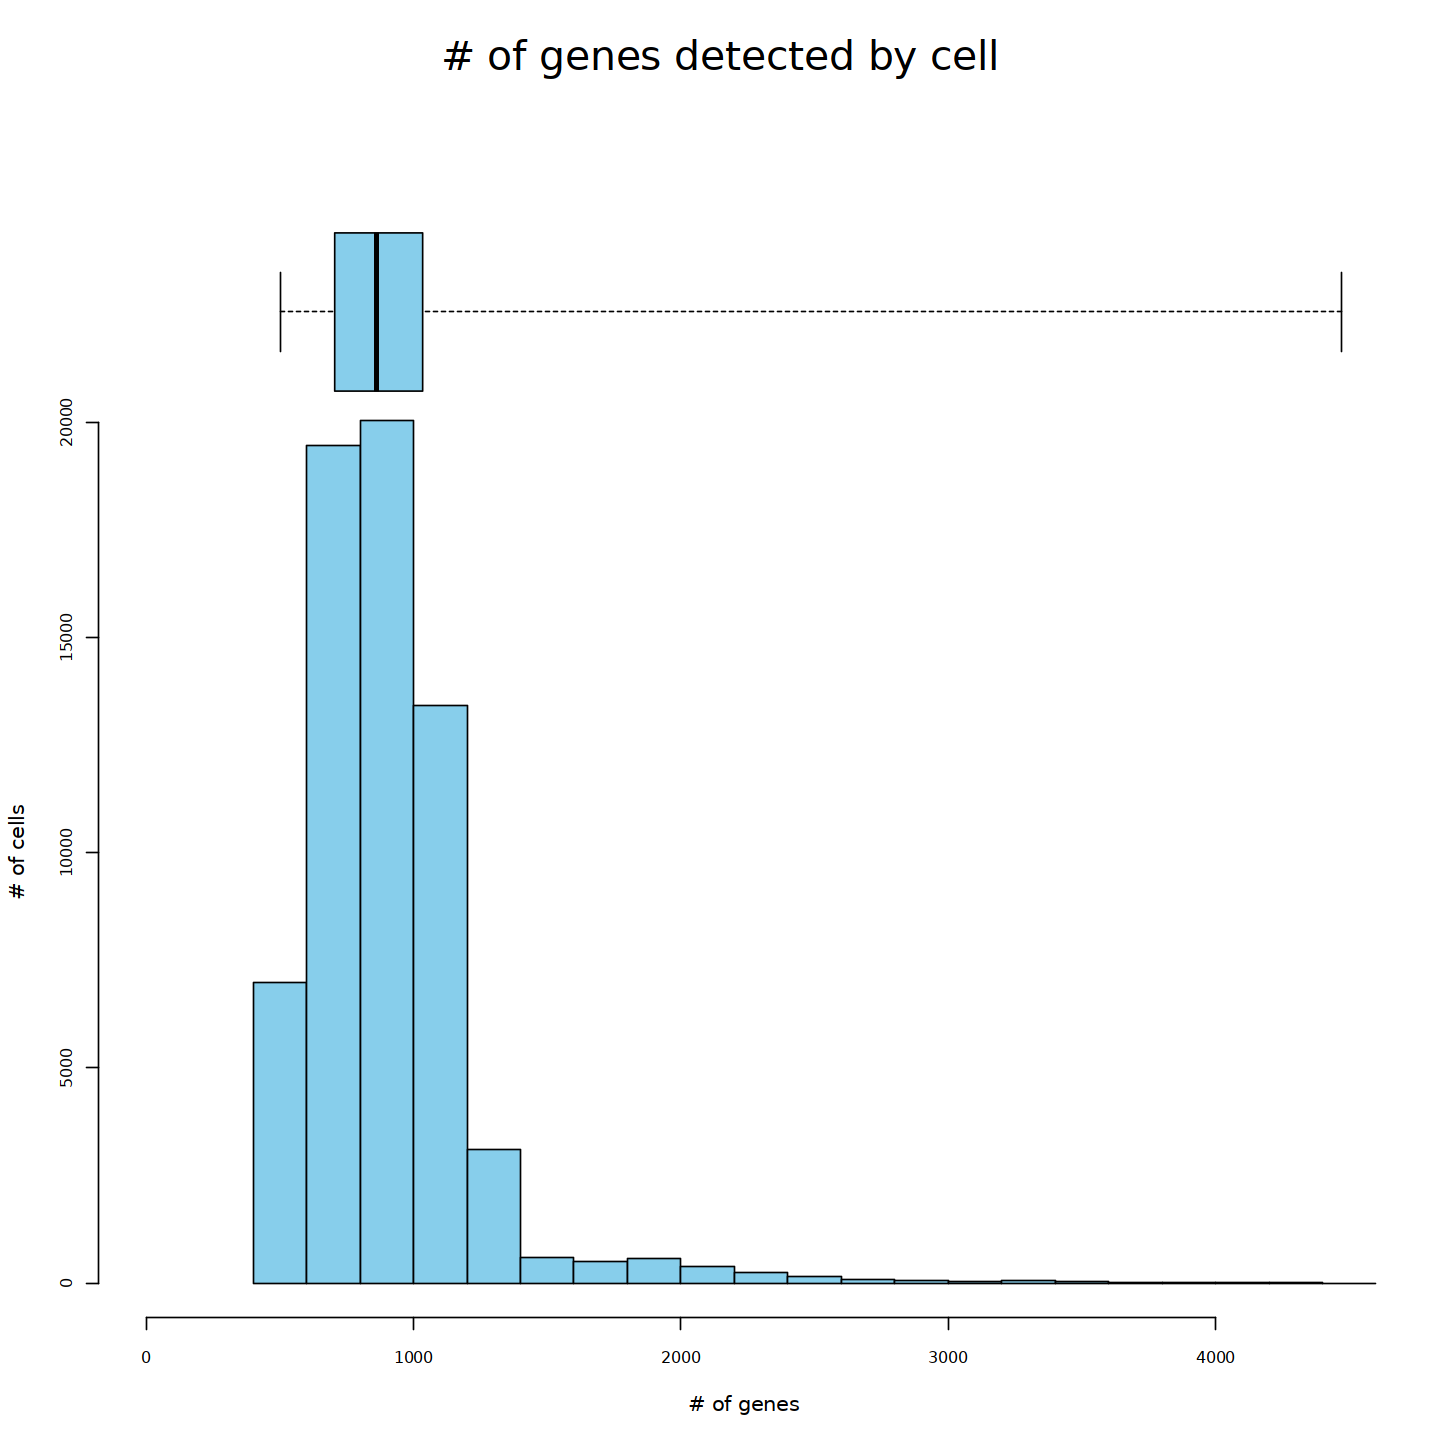

In [301]:
cells_rankings <- AUCell_buildRankings(scRNA@assays$RNA@data) 

In [302]:
geneSets  = list(model.gene = c('TNFSF14','CCNA2','MARCKS','SGO1','SAP130'))

In [303]:
geneSets

$model.gene
[1] "TNFSF14" "CCNA2"   "MARCKS"  "SGO1"    "SAP130"

In [340]:
cells_AUC <- AUCell_calcAUC(geneSets, cells_rankings,
                            aucMaxRank=nrow(cells_rankings)*0.1)

In [341]:
geneSet <- "model.gene"
aucs <- as.numeric(getAUC(cells_AUC)[geneSet, ])
scRNA$AUC <- aucs
df<- data.frame(scRNA@meta.data, scRNA@reductions$umap@cell.embeddings)
head(df,2)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.8,seurat_clusters,pANN_0.25_0.005_5450,DF.classifications_0.25_0.005_5450,celltype,group,AUC,UMAP_1,UMAP_2
,<chr>,<dbl>,<int>,<dbl>,<fct>,<fct>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
AAATCCTGTAAACGTACCACAGTAAAC_1,HBP-1.matrix,1918,907,0.6777894,6,6,0.03490401,Singlet,Neutrophils,HBP,0.3525894,1.459656,-1.5590200
AAATCCTGTAAACGTACCACTACATAT_1,HBP-1.matrix,1964,833,1.4765784,2,2,0.02094241,Singlet,Neutrophils,HBP,0.2316070,4.533564,0.8996112


In [342]:
options(repr.plot.width = 5,repr.plot.height = 5)

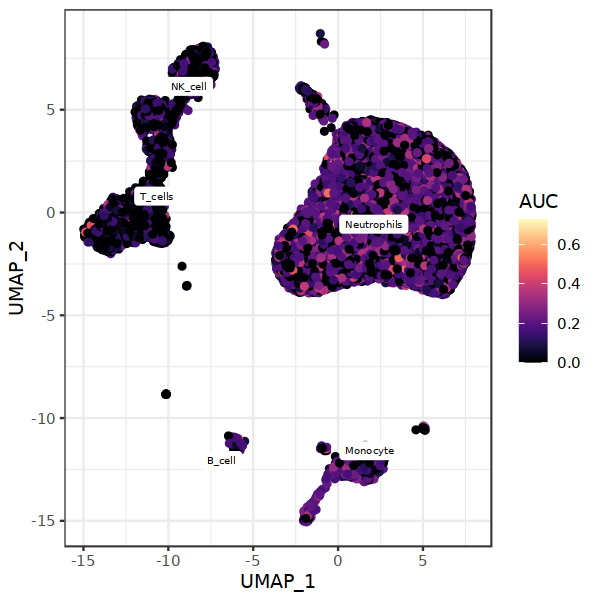

In [343]:
class_avg <- df %>%
  group_by( celltype) %>%
  summarise(
    UMAP_1 = median(UMAP_1),
    UMAP_2 = median(UMAP_2)
  )


ggplot(df, aes(UMAP_1, UMAP_2))  +
  geom_point(aes(colour  = AUC)) + viridis::scale_color_viridis(option="A") +
  ggrepel::geom_label_repel(aes(label = celltype),
                            data = class_avg,
                            size = 2,
                            label.size = 0,
                            segment.color = NA
  )+   theme(legend.position = "none") + theme_bw()

In [344]:
scd = scRNA

In [345]:
Idents(scd) = 'celltype'

In [346]:
scd@meta.data = df

In [347]:
options(repr.plot.width = 8,repr.plot.height = 5)

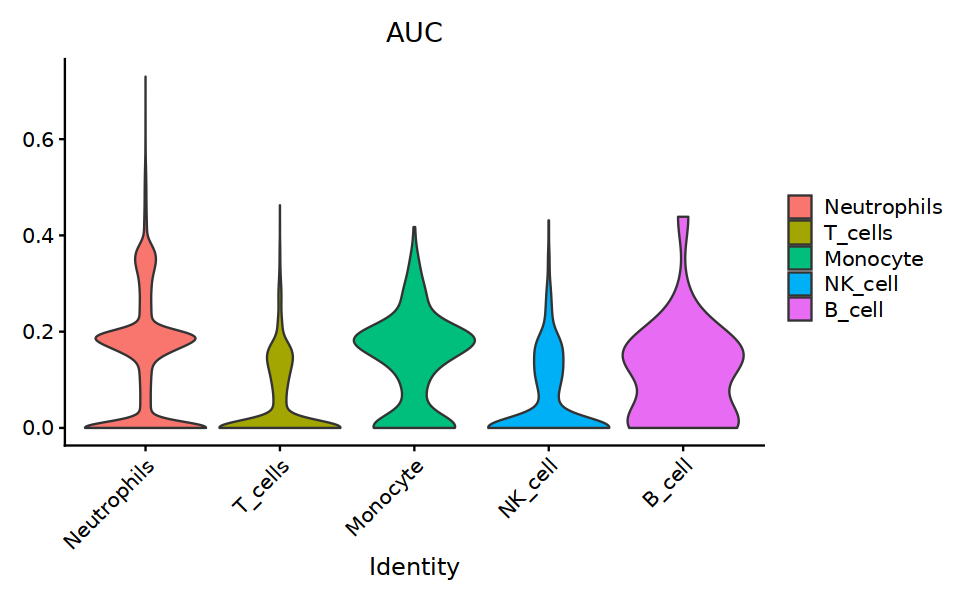

In [348]:
VlnPlot(scd,features = 'AUC',pt.size = 0)

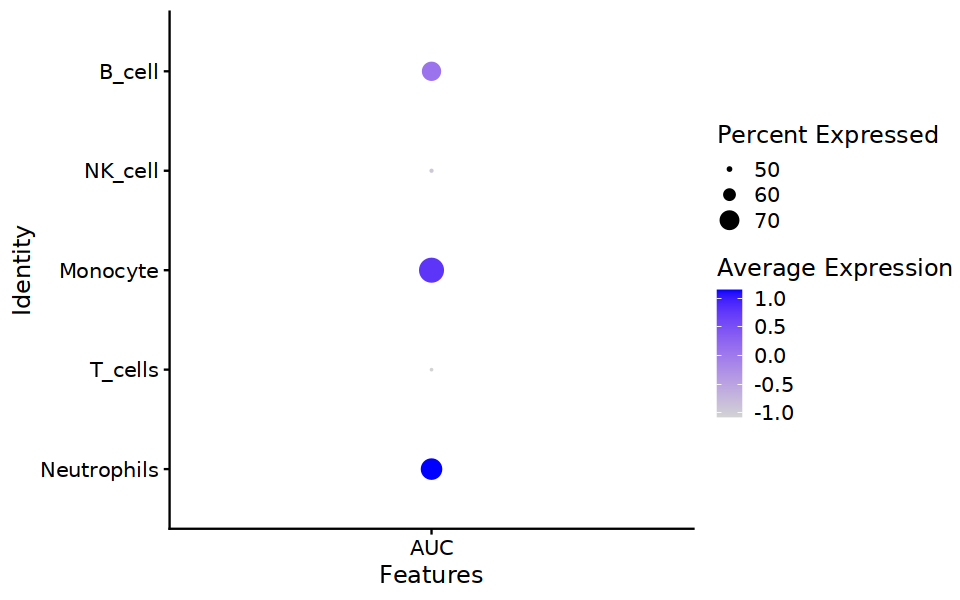

In [349]:
DotPlot(scd,features = 'AUC')

In [319]:
Idents(scd) = 'celltype'

In [256]:
# scd$celltype = gsub('[:+:]','-',scd$celltype)

In [257]:
# scd$celltype = gsub('Monocyte-CD16-','Monocyte',scd$celltype)

In [350]:
table(scd$celltype)


     B_cell    Monocyte     NK_cell Neutrophils     T_cells 
         26         512         699       62087        2466 

In [351]:
Idents(scd) = 'celltype'

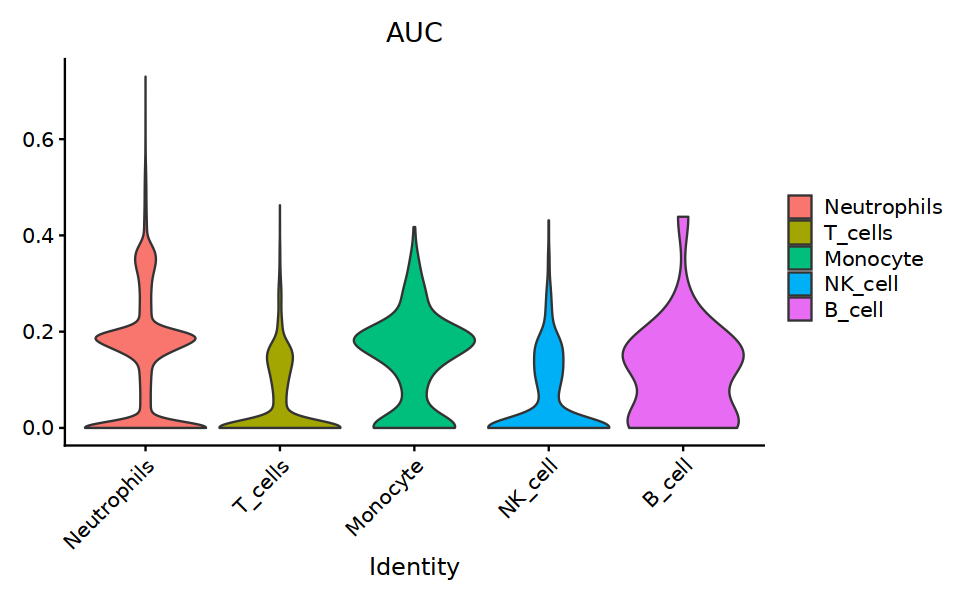

In [352]:
VlnPlot(scd,features = 'AUC',pt.size = 0)

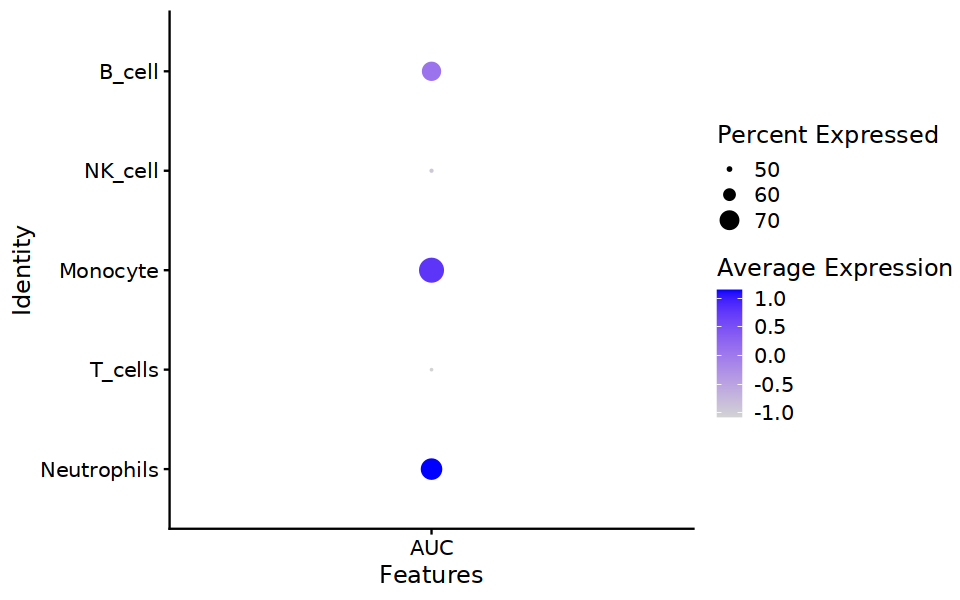

In [353]:
DotPlot(scd,features = 'AUC')

In [354]:
table(scRNA$celltype)


     B_cell    Monocyte     NK_cell Neutrophils     T_cells 
         26         512         699       62087        2466 

In [355]:
saveRDS(scRNA,file = 'scRNA.rds')

In [106]:
scRNA$group = ifelse(scRNA$orig.ident %in% c('GSM4104122_MS19270',  'GSM4104123_MS58637',  'GSM4104124_MS71658', 
                                             'GSM4104125_MS49131', 'GSM4104126_MS60249',  'GSM4104127_MS74594'),'MS','Control')

In [107]:
Idents(scRNA) ='celltype'

scedata = scRNA
table(scedata$group)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$group)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$group), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('MS', 'Control'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
# ggplot(Cellratio) + 
#   geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
#   theme_classic() +
#   labs(x='Sample',y = 'Ratio')+
#   scale_fill_manual(values = allcolour)+
#   theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)


Control      MS 
  14730   18484 


 T_cell:CD4+_central_memory                 NK_cell:IL2 
               0.2298729451                0.0342024448 
    Monocyte:leukotriene_D4 T_cell:CD4+_effector_memory 
               0.0553983260                0.3209188896 
                T_cell:CD8+              Monocyte:CD14+ 
               0.2407418558                0.0550069248 
              B_cell:Memory          T_cell:gamma-delta 
               0.0176732703                0.0202625399 
               B_cell:Naive                 T_cell:CD4+ 
               0.0095742759                0.0156259409 
             Monocyte:CD16+ 
               0.0007225869 

                             
                              Control   MS
  T_cell:CD4+_central_memory     2796 4839
  NK_cell:IL2                     382  754
  Monocyte:leukotriene_D4        1538  302
  T_cell:CD4+_effector_memory    4412 6247
  T_cell:CD8+                    3785 4211
  Monocyte:CD14+                 1064  763
  B_cell:Memory                    54  533
  T_cell:gamma-delta              180  493
  B_cell:Naive                    114  204
  T_cell:CD4+                     381  138
  Monocyte:CD16+                   24    0

In [108]:
saveRDS(scRNA,file = 'after_rename.rds')

## 往下都是没有运行的

In [109]:
options(repr.plot.height = 6,rpr.plot.wdith = 5)

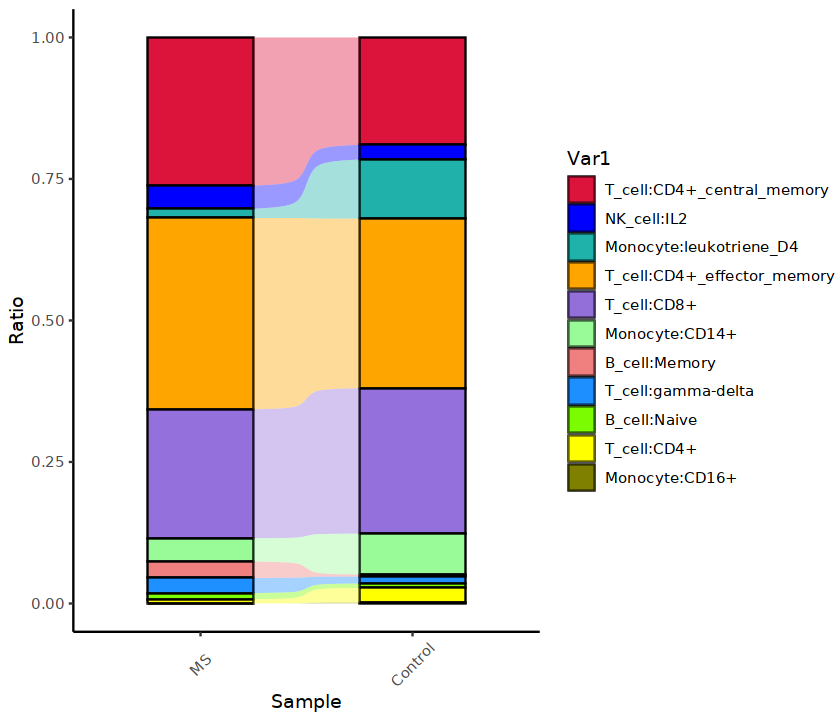

In [110]:
ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [111]:
ggsave('figure6.pdf',height =  5,width = 4)

In [124]:
getwd()

[1] "/import/csf"

In [123]:
for (i in unique(scRNA$celltype)){
    DefaultAssay(scRNA) = 'RNA'
    Idents(scRNA) = 'celltype'
    sce = subset(scRNA,idents = i)
    DotPlot(sce,group.by = 'group',features = 'DNM1L')
    ggsave(paste0(i,'.group.pdf'))
    
}

Warning message:
"Scaling data with a low number of groups may produce misleading results"
Saving 6.67 x 6.67 in image
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Saving 6.67 x 6.67 in image
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Saving 6.67 x 6.67 in image
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Saving 6.67 x 6.67 in image
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Saving 6.67 x 6.67 in image
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Saving 6.67 x 6.67 in image
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Saving 6.67 x 6.67 in image
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Saving 6.67 x 6.67 in image
Warning message:
"Scaling data with a low number

In [370]:
Idents(scRNA) = 'celltype'

sce.markers <- FindAllMarkers(object = scRNA, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
 

library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)



### https://zhuanlan.zhihu.com/p/573321126
## https://zhuanlan.zhihu.com/p/594345612


Calculating cluster Neutrophils

Calculating cluster T_cells

Calculating cluster Monocyte

Calculating cluster NK_cell

Calculating cluster B_cell



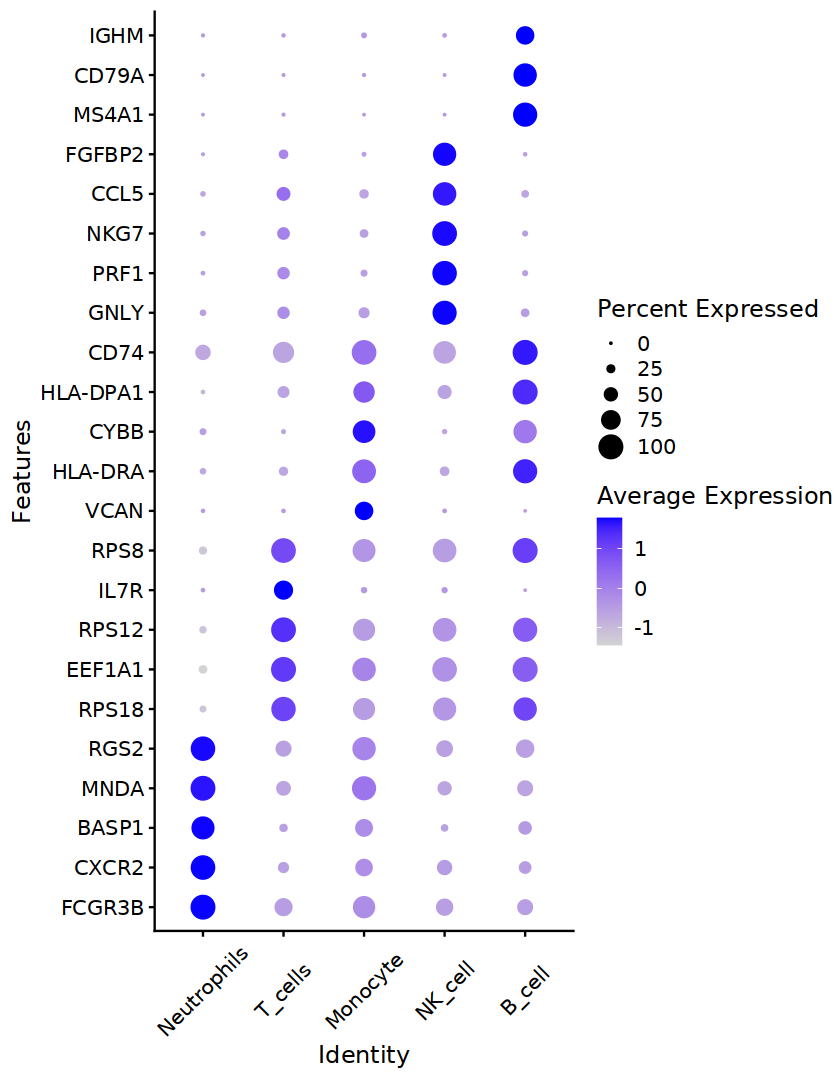

In [371]:
options(repr.plot.height = 9,repr.plot.width = 7)

 DotPlot(scRNA, features = unique(top5$gene) ,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [372]:
ggsave('figure7.pdf',height =  9,width = 8)

In [373]:
library('clusterProfiler')

In [374]:
library(dplyr) 
top50 <- sce.markers %>% group_by(cluster) %>% top_n(50, avg_log2FC)

group <- data.frame(gene=top50$gene,
                    group=top50$cluster)

Gene_ID <- bitr(top50$gene, fromType="SYMBOL", 
            toType="ENTREZID", 
            OrgDb="org.Hs.eg.db")
data  <- merge(Gene_ID,group,by.x='SYMBOL',by.y='gene')
data_GO <- compareCluster(
  ENTREZID~group, 
  data=data, 
  fun="enrichGO", 
  OrgDb="org.Hs.eg.db",
  ont = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff = 0.05,
  qvalueCutoff = 0.05,
  readable = TRUE
)





'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(top50$gene, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Hs.eg.db"):
"1.54% of input gene IDs are fail to map..."


In [375]:
data_GO_sim <- simplify(data_GO, 
                        cutoff=0.5, 
                        by="p.adjust", 
                        select_fun=min)

write.csv(data_GO_sim@compareClusterResult,file = 'enrichment.csv',row.names =F)

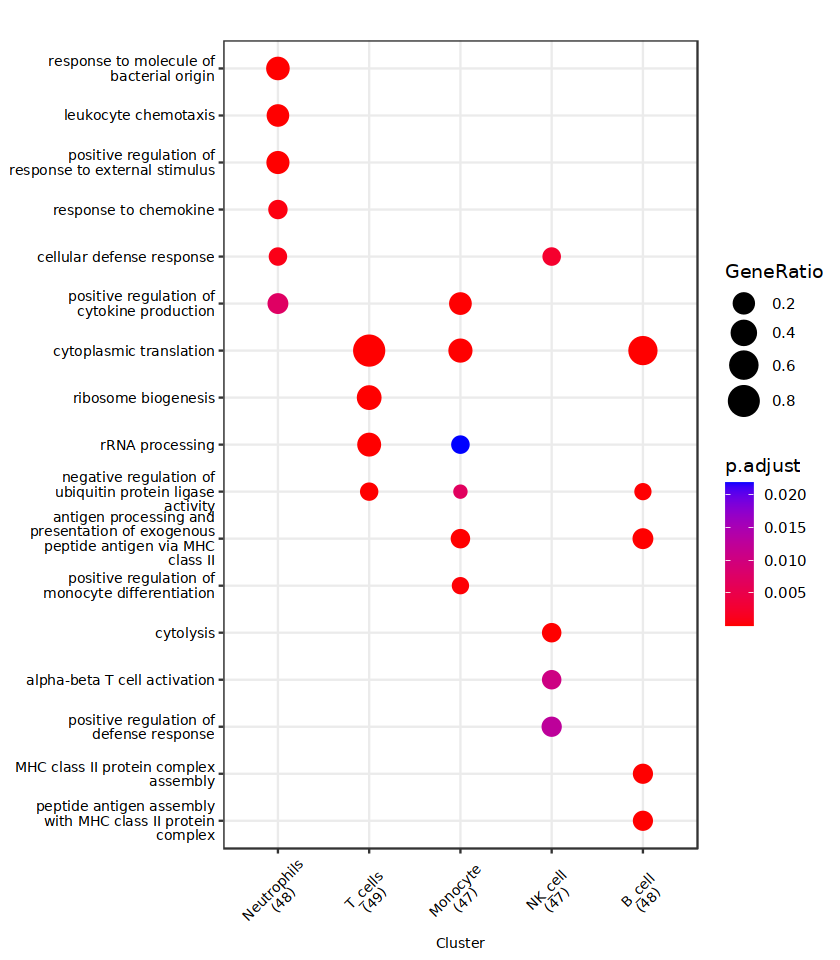

In [379]:
options(repr.plot.height = 8,repr.plot.width = 7)
enrichplot::dotplot(data_GO_sim, showCategory=4,font.size = 8)+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [377]:
ggsave('figure8.pdf',height =  9,width = 8)